In [99]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [100]:
import pandas as pd
import seaborn as sns
import statistics as sts
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import resample

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [101]:
df = pd.read_csv("/content/drive/MyDrive/US_Car_Accidents.csv")

In [102]:
df = df.drop(columns=["Start_Time", "End_Time", "Description", "Number", "Street", "City", "County", "State", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Precipitation(in)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Severity               100000 non-null  int64  
 2   Start_Lat              100000 non-null  float64
 3   Start_Lng              100000 non-null  float64
 4   End_Lat                100000 non-null  float64
 5   End_Lng                100000 non-null  float64
 6   Distance(mi)           100000 non-null  float64
 7   Side                   100000 non-null  object 
 8   Zipcode                99939 non-null   object 
 9   Country                100000 non-null  object 
 10  Timezone               99927 non-null   object 
 11  Temperature(F)         97686 non-null   float64
 12  Humidity(%)            97597 non-null   float64
 13  Pressure(in)           98198 non-null   float64
 14  Visibility(mi)         97382 non-null

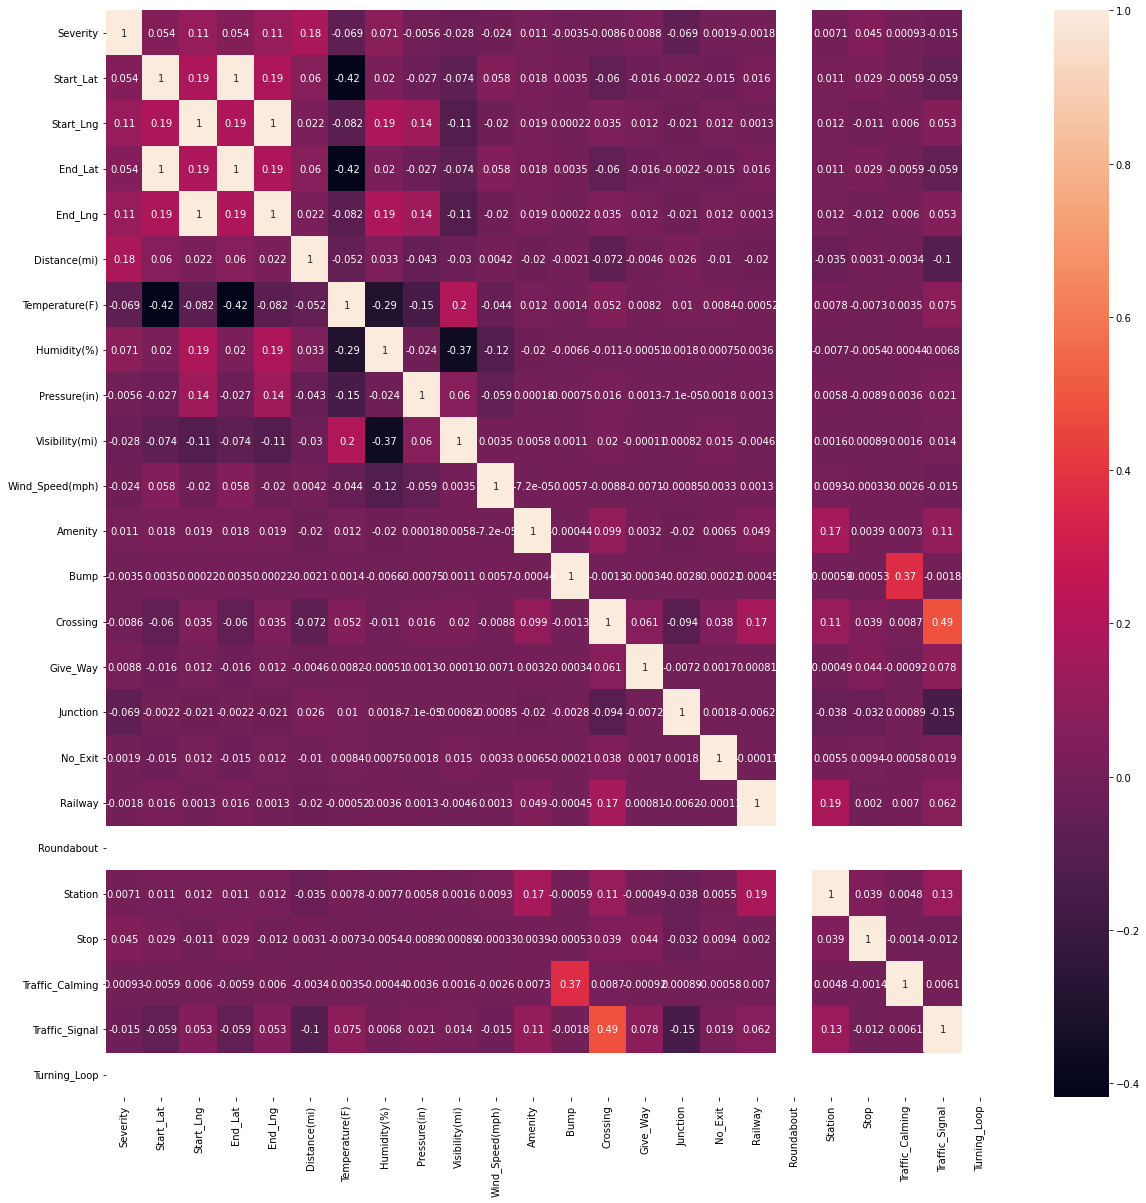

In [103]:
plt.figure(figsize=[20,20])
sns.heatmap(data=df.corr(), annot=True)

In [112]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,97686.000000,97597.000000,98198.000000,97382.000000,83672.000000
mean,2.455290,36.942501,-89.526425,36.942575,-89.526194,0.794974,63.423924,65.706159,30.023455,9.378675,9.014007
std,0.713082,5.008727,14.012552,5.008879,14.012582,1.906605,20.032216,20.867462,0.318306,3.230258,6.090642
min,2.000000,25.129476,-123.526160,25.130927,-123.526160,0.000000,-20.200000,4.000000,20.410000,0.000000,0.000000
25%,2.000000,33.461172,-95.564318,33.461180,-95.564210,0.145000,50.900000,50.000000,29.920000,10.000000,5.800000
50%,2.000000,38.485129,-85.753489,38.485149,-85.753615,0.404000,66.900000,67.000000,30.030000,10.000000,8.100000
75%,3.000000,40.999830,-80.137160,40.999085,-80.137490,0.740000,78.800000,83.000000,30.140000,10.000000,11.500000
max,4.000000,48.564331,-67.849851,48.580446,-67.849870,151.525000,129.200000,100.000000,30.920000,111.000000,822.800000


#Data Preproccessing

In [104]:
df.isnull().sum()

ID                           0
Severity                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Side                         0
Zipcode                     61
Country                      0
Timezone                    73
Temperature(F)            2314
Humidity(%)               2403
Pressure(in)              1802
Visibility(mi)            2618
Wind_Direction             909
Wind_Speed(mph)          16328
Weather_Condition         2575
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset              15
Civil_Tw

In [105]:
df["Severity"].value_counts()

2    67495
3    19481
4    13024
Name: Severity, dtype: int64

In [106]:
Severity2 = df[(df["Severity"] == 2)]
Severity3 = df[(df["Severity"] == 4)] 
Severity4 = df[(df["Severity"] == 4)] 

Severity2_resampled = resample(Severity2, replace=True, n_samples= 33333, random_state=42)
Severity3_resampled = resample(Severity3, replace=True, n_samples= 33333, random_state=42)
Severity4_resampled = resample(Severity4, replace=True, n_samples= 33333, random_state=42)

re_df = pd.concat([Severity2, Severity3, Severity4])
re_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93543 entries, 1 to 99953
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     93543 non-null  object 
 1   Severity               93543 non-null  int64  
 2   Start_Lat              93543 non-null  float64
 3   Start_Lng              93543 non-null  float64
 4   End_Lat                93543 non-null  float64
 5   End_Lng                93543 non-null  float64
 6   Distance(mi)           93543 non-null  float64
 7   Side                   93543 non-null  object 
 8   Zipcode                93491 non-null  object 
 9   Country                93543 non-null  object 
 10  Timezone               93478 non-null  object 
 11  Temperature(F)         91366 non-null  float64
 12  Humidity(%)            91271 non-null  float64
 13  Pressure(in)           91858 non-null  float64
 14  Visibility(mi)         91092 non-null  float64
 15  Wi

#Classifier

In [107]:
X = re_df[["Distance(mi)", "Start_Lng", "End_Lng"]]
y = re_df["Severity"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [109]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [111]:
recall = recall_score(pred, y_test, pos_label=4)
recall

0.7657538766083801